In [167]:
from scipy.stats import rayleigh
from scipy.optimize import root_scalar,fsolve
import numpy as np
import matplotlib.pyplot as plt

# 1. Построение распределений


Сгенерировать выборку с распределением Рэлэя ( https://ru.wikipedia.org/wiki/Распределение_Рэлея ) используя numpy и scipy и построить на основе ее кривую плотности распределения на основе гистограммы из Matplotlib

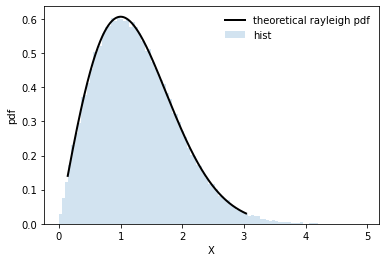

In [168]:
x0 = np.linspace(rayleigh.ppf(0.01),
                rayleigh.ppf(0.99), 1000)
plt.plot(x0, rayleigh.pdf(x0), 'k-', lw=2, label='theoretical rayleigh pdf')

x = rayleigh.rvs(size=100000)

plt.hist(x, density=True, bins=100, histtype='stepfilled', alpha=0.2, label='hist')
plt.xlabel('X')
plt.ylabel('pdf')
plt.legend(loc='best', frameon=False)
plt.show()

# 2. Построение графика на по функции


Сгенерировать массивы по функции (x^2 + y^2 - 1)^3 - x^2 y^3 = 0 и построить на основе них график.
x=r*cos(fi)
y=r*sin(fi)
r(r^2-1)^3=cos(fi)^2 sin(fi)^3 - слишком сложно

In [169]:
fi = np.linspace(0,2*np.pi,360)

fi_0 = 0
def func(x):
  global fi_0
  return x*( (x**2 - 1)**3 ) - (np.cos(fi_0)**2) * (np.sin(fi_0)**3)

In [170]:
r=[]
r0=1.5
for t in fi:
  fi_0=t
  r.append(fsolve(func,1.6)[0,])
r = np.array(r)

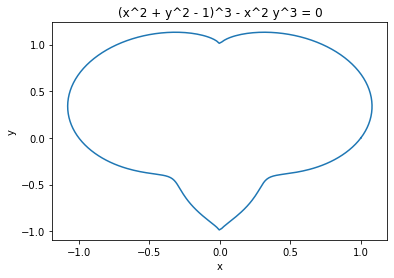

In [171]:
plt.plot(r*np.cos(fi),r*np.sin(fi))
plt.xlabel('x')
plt.ylabel('y')
plt.title('(x^2 + y^2 - 1)^3 - x^2 y^3 = 0')
plt.show()

In [172]:
r=[]
r0=1.5
for t in fi:
  fi_0=t
  r.append(root_scalar(func, bracket=[0.5, 2], method='brentq').root)
r = np.array(r)

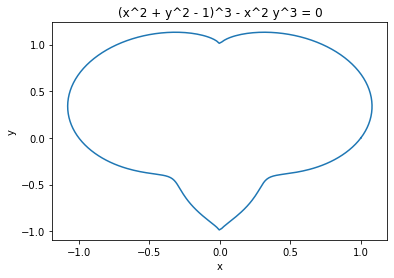

In [173]:
plt.plot(r*np.cos(fi),r*np.sin(fi))
plt.xlabel('x')
plt.ylabel('y')
plt.title('(x^2 + y^2 - 1)^3 - x^2 y^3 = 0')
plt.show()

# 3. Анализ зависимостей

Найти зависимости представленные в датасете приложенном к заданию. Представить в виде графиков в файле формата Notebook

## Загрузка и обработка данных


In [6]:
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []
with open('./dataset_home.txt','r') as file:
  for rec in file.readlines():
    tmp=rec.split(",")
    age.append(int(tmp[0]))
    sex.append(1 if tmp[1] == 'male' else 0)
    bmi.append(float(tmp[2]))
    children.append(int(tmp[3]))
    smoker.append(1 if tmp[4] == 'yes' else 0)
    if tmp[5] == 'northwest':
      region.append(0)
    elif tmp[5] == 'northeast':
      region.append(1)
    elif tmp[5] == 'southwest':
      region.append(2)
    elif tmp[5] == 'southeast':
      region.append(3)
    else:
      region.append(4)
    charges.append(float(tmp[6]))

In [30]:
age = np.array(age)
sex = np.array(sex)
bmi = np.array(bmi)
children = np.array(children)
smoker = np.array(smoker)
region = np.array(region)
charges = np.array(charges)
Labels = ['Age','Sex','BMI','Children','Smoker','Region','Charges']
Vars = [age,sex,bmi,children,smoker,region,charges]
numVars = [age,bmi,children,charges]
numLabels = ['Age','BMI','Children','Charges']

## Построение графиков

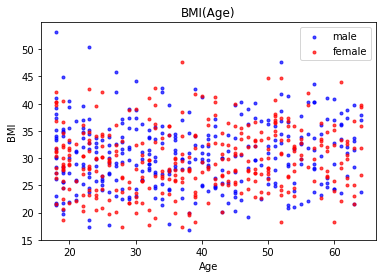

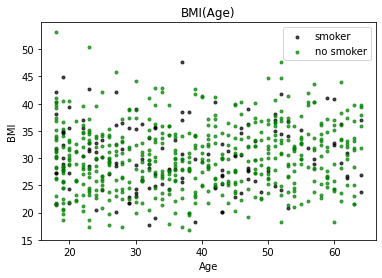

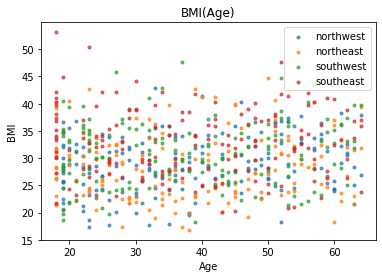

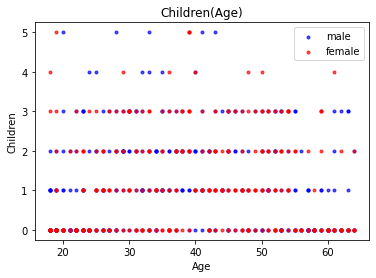

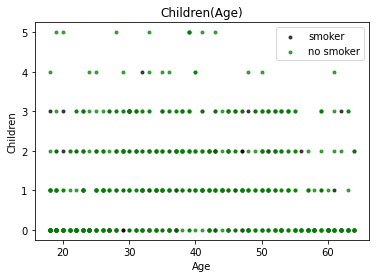

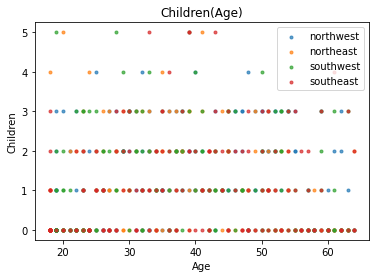

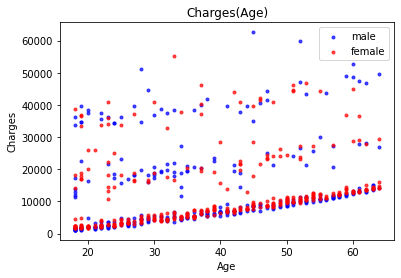

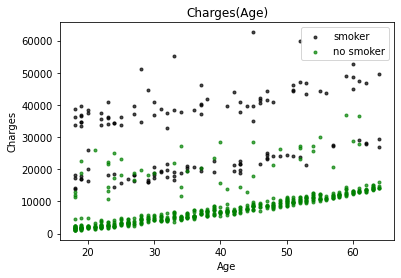

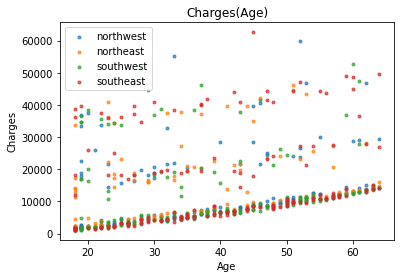

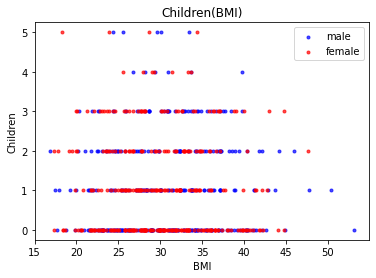

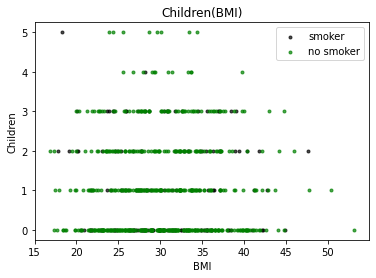

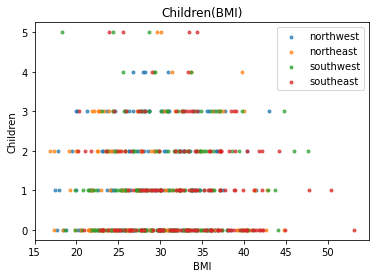

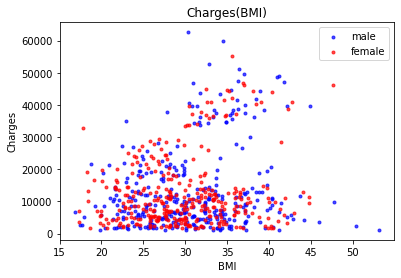

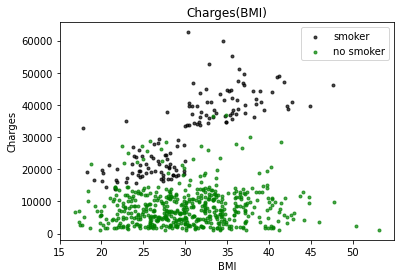

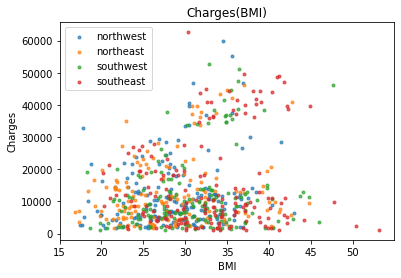

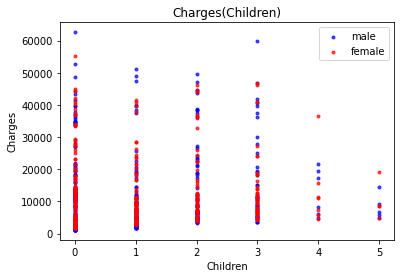

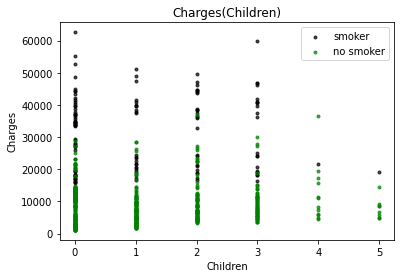

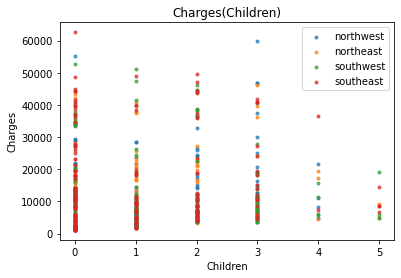

In [49]:
#figure, axis = plt.subplots(7, 7)
n=len(numVars)
for i in range(n):
  for j in range(i,n):
    if i != j:
      x,y,xLab,yLab=numVars[i],numVars[j],numLabels[i],numLabels[j]
      plt.scatter(x[sex==1],y[sex==1],marker=".",c='blue',label='male',alpha=0.7)
      plt.scatter(x[sex==0],y[sex==0],marker=".",c='red',label='female',alpha=0.7)
      plt.xlabel(xLab)
      plt.ylabel(yLab)
      plt.title(yLab+ '(' +xLab+')')
      plt.legend()
      plt.show()
      
      plt.scatter(x[smoker==1],y[smoker==1],marker=".",c='black',label='smoker',alpha=0.7)
      plt.scatter(x[smoker==0],y[smoker==0],marker=".",c='green',label='no smoker',alpha=0.7)
      plt.xlabel(xLab)
      plt.ylabel(yLab)
      plt.title(yLab+ '(' +xLab+')')
      plt.legend()
      plt.show()

      plt.scatter(x[region==0],y[region==0],marker=".",label='northwest',alpha=0.7)
      plt.scatter(x[region==1],y[region==1],marker=".",label='northeast',alpha=0.7)
      plt.scatter(x[region==2],y[region==2],marker=".",label='southwest',alpha=0.7)
      plt.scatter(x[region==3],y[region==3],marker=".",label='southeast',alpha=0.7)
      plt.xlabel(xLab)
      plt.ylabel(yLab)
      plt.title(yLab+ '(' +xLab+')')
      plt.legend()
      plt.show()
      #axis[i,j].scatter(x,y,marker=".",s=1)
      #axis[i,j].set_title(yLab+ '(' +xLab+')')

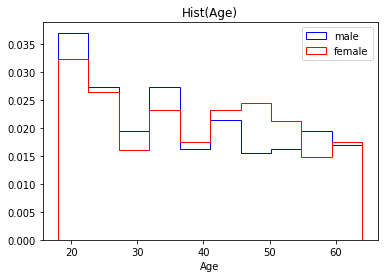

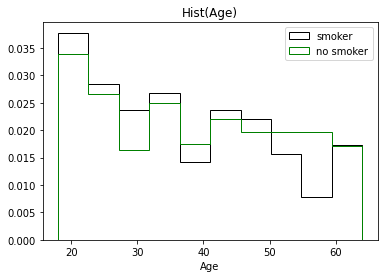

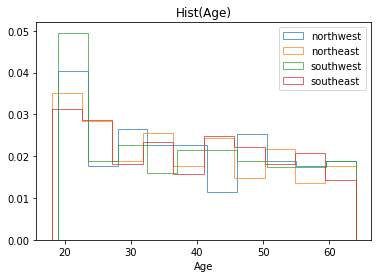

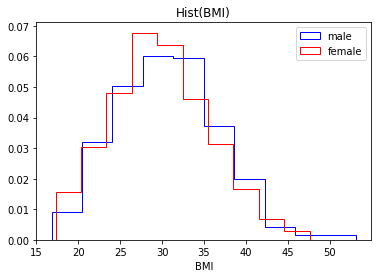

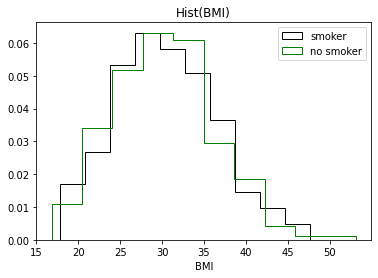

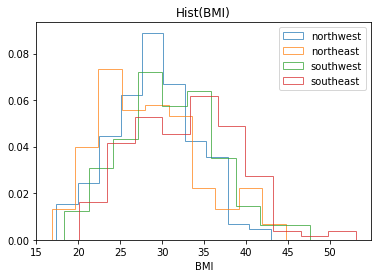

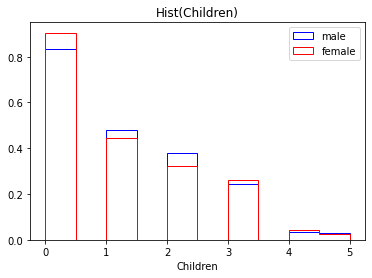

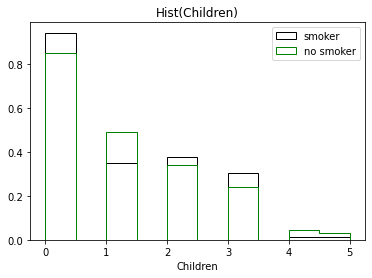

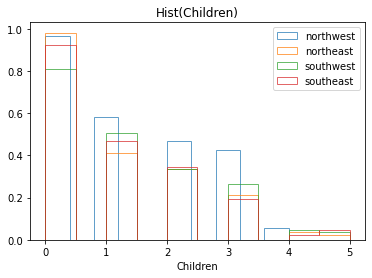

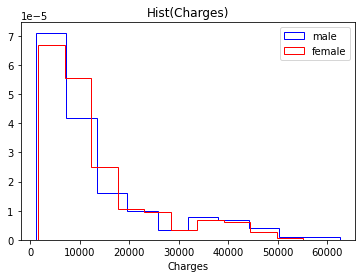

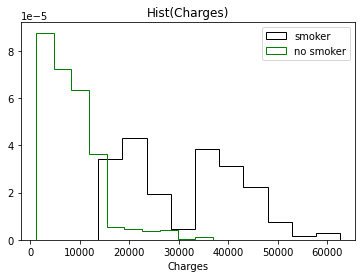

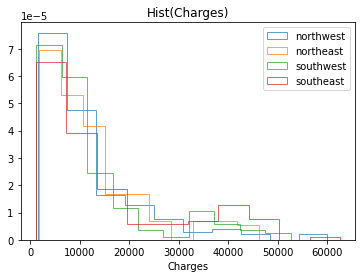

In [47]:
n=len(numVars)
for i in range(n):
  x,xLab=numVars[i],numLabels[i]
  plt.hist(x[sex==1],histtype='step',density=True,color='blue',label='male')
  plt.hist(x[sex==0],histtype='step',density=True,color='red',label='female')
  plt.xlabel(xLab)
  plt.title('Hist(' +xLab+')')
  plt.legend()
  plt.show()
      
  plt.hist(x[smoker==1],histtype='step',density=True,color='black',label='smoker')
  plt.hist(x[smoker==0],histtype='step',density=True,color='green',label='no smoker')
  plt.xlabel(xLab)
  plt.title('Hist(' +xLab+')')
  plt.legend()
  plt.show()

  plt.hist(x[region==0],histtype='step',density=True,label='northwest',alpha=0.7)
  plt.hist(x[region==1],histtype='step',density=True,label='northeast',alpha=0.7)
  plt.hist(x[region==2],histtype='step',density=True,label='southwest',alpha=0.7)
  plt.hist(x[region==3],histtype='step',density=True,label='southeast',alpha=0.7)
  plt.xlabel(xLab)
  plt.title('Hist(' +xLab+')')
  plt.legend()
  plt.show()